In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix

#Gets the current working directory
cwd = os.getcwd()
#Enter filepath where the dataset is stored
path = '//Users//Ryan1//Desktop//CE802-2020-21-ML and Data Mining//Assignment//CE802_P2_Data'
#Changes directory to the path specified
os.chdir(path)

#Imports the dataset to pandas dataframe
dataset = pd.read_csv('CE802_P2_Data.csv')

In [2]:
#Initial look at the dataset
dataset.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True
5,6.72,-12.90,325,11.54,-3.94,16.50,14.82,-76.98,-408.72,20,14.55,39.66,9.25,-3.27,7.02,True
6,-8.61,-23.79,44,12.48,-7.29,0.96,10.24,-34.98,-468.72,2,-0.36,95.66,0.56,1.98,6.53,True
7,5.85,-9.39,390,13.68,-2.43,34.35,18.27,-36.98,-588.72,20,13.56,109.66,5.50,-3.84,NaN,False
8,-13.80,-27.00,25,11.72,-9.73,5.58,9.47,-34.98,-450.72,2,-0.27,83.66,0.56,4.96,NaN,False
9,4.02,-11.46,95,10.38,-6.33,30.60,17.22,-56.98,-758.72,20,12.36,139.66,5.70,-2.87,NaN,True


In [3]:
#Initial look at the distribution of the dataset
dataset.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,-4.569780,-20.474600,109.024667,12.744707,-6.248787,14.90628,13.107813,-42.25600,-557.610667,10.806667,3.878840,108.488000,3.854280,0.147533,5.783013
std,7.662813,7.635517,117.334580,2.217929,2.540644,12.97563,3.166909,14.31863,142.833748,9.009814,7.541549,80.376896,3.465276,2.491236,1.005117
min,-29.760000,-45.570000,0.000000,8.020000,-15.280000,0.00000,9.420000,-76.98000,-888.720000,0.000000,-19.110000,-120.340000,0.000000,-4.360000,3.060000
25%,-10.260000,-26.130000,15.000000,11.440000,-8.130000,3.72000,10.140000,-56.98000,-678.720000,2.000000,-1.950000,71.660000,0.600000,-2.230000,5.062500
50%,-7.560000,-23.445000,50.000000,12.440000,-7.230000,6.21000,10.500000,-34.98000,-486.720000,2.000000,0.930000,97.660000,1.020000,1.100000,5.790000
75%,2.917500,-13.110000,195.000000,13.900000,-3.770000,24.60000,15.870000,-30.98000,-446.720000,20.000000,11.100000,139.660000,7.050000,1.982500,6.530000
max,8.850000,-6.780000,390.000000,21.220000,-1.590000,47.10000,19.570000,-24.98000,-398.720000,20.000000,17.310000,309.660000,10.350000,7.880000,8.140000


In [4]:
#Identify how many null values are in the dataset
dataset.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [5]:
#Isolates the features
X = dataset.iloc[:, 0:15]
#Isolates the labels/ground truth
Y = dataset.iloc[:, [15]]

#Splits the dataset into training (80%) and test sets (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#Creates a list of imputers to iterate through the models
imp = ['mean', 'median', 'most_frequent','constant']

In [6]:
#Function that takes an imputer value from the list e.g. mean, median etc and runs it through a gridsearch pipeline
#using a decision tree as the model
def Decision_tree_pipeline(imputer1):
    #Replaces the missing values with the imputed values
    imputer = SimpleImputer(missing_values=np.nan, strategy=imputer1)
    model = DecisionTreeClassifier()
    #Creates pipeline that takes the specified imputer and model
    pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
    #List of parameters to be used by Gridsearch
    parameters = {
    'm__splitter': ('best','random'),
    'm__criterion' :['gini', 'entropy'],
    'm__max_depth': [2, 10, 20, None]
    }
    cv = GridSearchCV(pipeline, parameters, cv=10)
    cv1 = cv.fit(X_train, Y_train.values.ravel())
    print('Classifier: Decision Tree  \nImputation: ', imputer1)
    #Calls function that prints the results from each fold of the Gridsearch and the best parameters
    gridsearch_results(cv1)
    #Applies the optimal parameters from Gridsearch on to the test set
    y_pred = cv1.predict(X_test)
    #Calls the evaluation function that produces accuracy/precision/recall/Kappa scores and confusion matrices
    evaluation(cv1, y_pred)

In [7]:
#Function that takes an imputer value from the list e.g. mean, median etc and runs it through a gridsearch pipeline
#using a SVM as the model
def SVM_pipeline(imputer1):
    #Replaces the missing values with the imputed values
    imputer = SimpleImputer(missing_values=np.nan, strategy=imputer1)
    #Creates pipeline that takes the specified imputer, scaler and model
    scaler = StandardScaler()
    model = svm.SVC()
    #Creates pipeline that takes the specified imputer, scaler and model
    pipeline = Pipeline(steps=[('i', imputer), ('s', scaler), ('m', model)])
    #List of parameters to be used by Gridsearch
    parameters = {
    'm__kernel': ('linear','poly', 'rbf', 'sigmoid'),
    'm__C': [1, 10, 100],
    'm__gamma': ('auto','scale')
    }
    cv = GridSearchCV(pipeline, parameters, cv=10)
    cv1 = cv.fit(X_train, Y_train.values.ravel())
    print('Classifier: SVM  \nImputation: ', imputer1)
    #Calls function that prints the results from each fold of the Gridsearch and the best parameters
    gridsearch_results(cv1)
    #Applies the optimal parameters from Gridsearch on to the test set
    y_pred = cv1.predict(X_test)
    #Calls the evaluation function that produces accuracy/precision/recall/Kappa scores and confusion matrices
    evaluation(cv1, y_pred)

In [8]:
#Function that takes an imputer value from the list e.g. mean, median etc and runs it through a gridsearch pipeline
#using a KNN as the model
def KNN_pipeline(imputer1):
    #Replaces the missing values with the imputed values
    imputer = SimpleImputer(missing_values=np.nan, strategy=imputer1)
    scaler = StandardScaler()
    model = KNeighborsClassifier()
    #Creates pipeline that takes the specified imputer, scaler and model
    pipeline = Pipeline(steps=[('i', imputer), ('s', scaler), ('m', model)])
    #List of parameters to be used by Gridsearch
    parameters = {
    'm__n_neighbors':[5,50,100],
    'm__weights':('uniform','distance'),
    'm__metric':('minkowski', 'euclidean', 'manhattan', 'chebyshev')
    }
    cv = GridSearchCV(pipeline, parameters, cv=10)
    cv1 = cv.fit(X_train, Y_train.values.ravel())
    print('Classifier: K-Nearest Neighbour  \nImputation Method: ', imputer1)
    #Calls function that prints the results from each fold of the Gridsearch and the best parameters
    gridsearch_results(cv1)
    #Applies the optimal parameters from Gridsearch on to the test set
    y_pred = cv1.predict(X_test)
    #Calls the evaluation function that produces accuracy/precision/recall/Kappa scores and confusion matrices
    evaluation(cv1, y_pred)

In [9]:
#Function that takes the result of each fold of the gridsearch and provides the mean, standard deviation
#and the parameters that were selected. Also prints the best parameters and their scores
def gridsearch_results(results):
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    for mean_scores, st_dev_score, parameters in zip(mean_score, std_score, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean_scores, 3), round(st_dev_score * 2, 3), parameters))
    print('\033[1m'+'\nBest Parameters: {}\n'.format(results.best_params_)+'\033[0m')

In [10]:
#Function that takes the pipeline and predictions each model function and produces all selected evaluation metrics
def evaluation(cv1, y_pred):
    #Provides accuracy scores from comparing the test labels and predictions
    accuracy = round(accuracy_score(Y_test, y_pred), 3)
    #Provides precision scores from comparing the test labels and predictions
    precision = round(precision_score(Y_test, y_pred), 3)
    #Provides recall scores from comparing the test labels and predictions
    recall = round(recall_score(Y_test, y_pred), 3)
    #Creates confusion matrix from the test labels and predictions
    conf_matrix = confusion_matrix(Y_test, y_pred)  
    print('\nFinal Parameters:{} \nAccuracy: {} / Precision: {} / Recall: {}'.format(cv1.best_params_,accuracy,precision,recall))
    print('Confusion Matrix\n',conf_matrix)
    #Produces the confusion matrix in graphical form
    plot_confusion_matrix(cv1, X_test, Y_test)  
    plt.show() 
    print('Kappa score',round(cohen_kappa_score(Y_test, y_pred),3))

Classifier: Decision Tree  
Imputation:  mean
0.682 (+/-0.058) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'best'}
0.653 (+/-0.108) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'random'}
0.772 (+/-0.056) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'best'}
0.776 (+/-0.085) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'random'}
0.785 (+/-0.067) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'best'}
0.758 (+/-0.09) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'random'}
0.788 (+/-0.096) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'best'}
0.778 (+/-0.077) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'random'}
0.657 (+/-0.069) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'best'}
0.643 (+/-0.052) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'random'}
0.782 (+/-0.042) for {'m__criterion': 'entropy', 

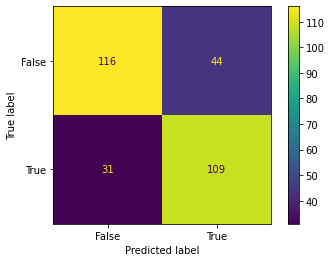

Kappa score 0.501


In [11]:
dt_mean = Decision_tree_pipeline(imp[0])

Classifier: Decision Tree  
Imputation:  median
0.682 (+/-0.058) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'best'}
0.668 (+/-0.083) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'random'}
0.777 (+/-0.036) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'best'}
0.746 (+/-0.074) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'random'}
0.783 (+/-0.082) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'best'}
0.777 (+/-0.095) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'random'}
0.785 (+/-0.087) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'best'}
0.781 (+/-0.086) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'random'}
0.657 (+/-0.069) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'best'}
0.643 (+/-0.088) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'random'}
0.782 (+/-0.027) for {'m__criterion': 'entropy

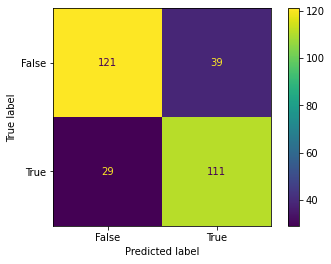

Kappa score 0.547


In [12]:
dt_median = Decision_tree_pipeline(imp[1])

Classifier: Decision Tree  
Imputation:  most_frequent
0.694 (+/-0.061) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'best'}
0.654 (+/-0.08) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'random'}
0.783 (+/-0.06) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'best'}
0.754 (+/-0.062) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'random'}
0.774 (+/-0.077) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'best'}
0.78 (+/-0.048) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'random'}
0.775 (+/-0.078) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'best'}
0.776 (+/-0.08) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'random'}
0.676 (+/-0.076) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'best'}
0.639 (+/-0.082) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'random'}
0.791 (+/-0.055) for {'m__criterion': 'entr

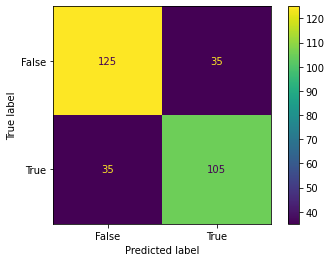

Kappa score 0.531


In [13]:
dt_mode = Decision_tree_pipeline(imp[2])

Classifier: Decision Tree  
Imputation:  constant
0.694 (+/-0.061) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'best'}
0.658 (+/-0.131) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'random'}
0.782 (+/-0.06) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'best'}
0.755 (+/-0.07) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'random'}
0.782 (+/-0.061) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'best'}
0.753 (+/-0.054) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'random'}
0.765 (+/-0.032) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'best'}
0.753 (+/-0.095) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'random'}
0.693 (+/-0.075) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'best'}
0.635 (+/-0.08) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'random'}
0.776 (+/-0.057) for {'m__criterion': 'entropy'

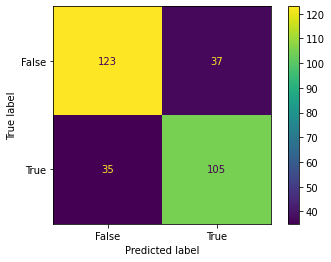

Kappa score 0.518


In [14]:
dt_zero = Decision_tree_pipeline(imp[3])

Classifier: SVM  
Imputation:  mean
0.857 (+/-0.049) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.823 (+/-0.049) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.806 (+/-0.053) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.624 (+/-0.077) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.857 (+/-0.049) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.823 (+/-0.049) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'poly'}
0.806 (+/-0.053) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.624 (+/-0.077) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'sigmoid'}
0.877 (+/-0.052) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.876 (+/-0.054) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.875 (+/-0.054) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.591 (+/-0.084) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.877 (+/-0.052) for {'m__C': 10, 'm__gamma': 'scale', '

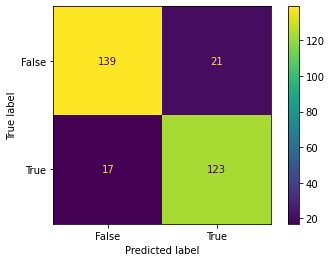

Kappa score 0.746


In [15]:
SVM_mean = SVM_pipeline(imp[0])

Classifier: SVM  
Imputation:  median
0.86 (+/-0.049) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.823 (+/-0.058) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.809 (+/-0.058) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.624 (+/-0.084) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.86 (+/-0.049) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.823 (+/-0.058) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'poly'}
0.809 (+/-0.058) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.624 (+/-0.084) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'sigmoid'}
0.877 (+/-0.047) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.876 (+/-0.054) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.877 (+/-0.05) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.591 (+/-0.085) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.877 (+/-0.047) for {'m__C': 10, 'm__gamma': 'scale', 'm

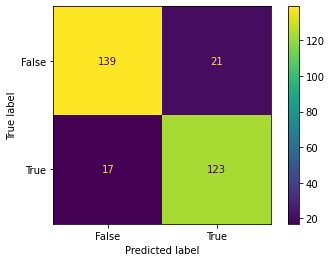

Kappa score 0.746


In [16]:
SVM_median = SVM_pipeline(imp[1])

Classifier: SVM  
Imputation:  most_frequent
0.829 (+/-0.074) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.77 (+/-0.06) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.793 (+/-0.069) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.581 (+/-0.071) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.829 (+/-0.074) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.77 (+/-0.06) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'poly'}
0.793 (+/-0.069) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.581 (+/-0.071) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'sigmoid'}
0.867 (+/-0.063) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.871 (+/-0.047) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.868 (+/-0.035) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.554 (+/-0.078) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.867 (+/-0.063) for {'m__C': 10, 'm__gamma': 'scal

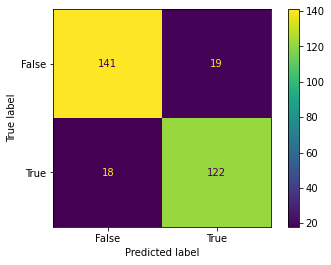

Kappa score 0.752


In [17]:
SVM_mode = SVM_pipeline(imp[2])

Classifier: SVM  
Imputation:  constant
0.804 (+/-0.08) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.762 (+/-0.06) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.77 (+/-0.079) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.513 (+/-0.08) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.804 (+/-0.08) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.762 (+/-0.06) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'poly'}
0.77 (+/-0.079) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.513 (+/-0.08) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'sigmoid'}
0.857 (+/-0.057) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.862 (+/-0.052) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'poly'}
0.877 (+/-0.063) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.487 (+/-0.063) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'sigmoid'}
0.857 (+/-0.057) for {'m__C': 10, 'm__gamma': 'scale', 'm__k

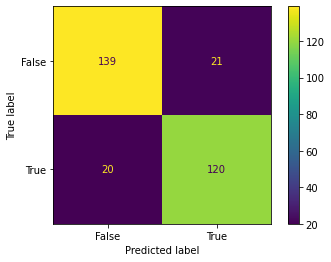

Kappa score 0.726


In [18]:
SVM_zero = SVM_pipeline(imp[3])

Classifier: K-Nearest Neighbour  
Imputation Method:  mean
0.766 (+/-0.077) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.769 (+/-0.071) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.765 (+/-0.06) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.773 (+/-0.054) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'distance'}
0.745 (+/-0.058) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'uniform'}
0.762 (+/-0.059) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'distance'}
0.766 (+/-0.077) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.769 (+/-0.071) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.765 (+/-0.06) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.773 (+/-0.054) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': 'd

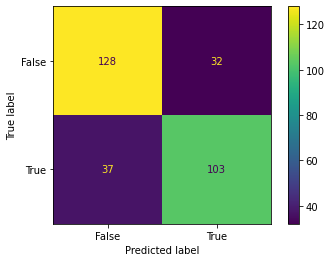

Kappa score 0.537


In [19]:
KNN_mean = KNN_pipeline(imp[0])

Classifier: K-Nearest Neighbour  
Imputation Method:  median
0.767 (+/-0.067) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.77 (+/-0.061) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.762 (+/-0.052) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.776 (+/-0.047) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'distance'}
0.746 (+/-0.054) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'uniform'}
0.764 (+/-0.064) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'distance'}
0.767 (+/-0.067) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.77 (+/-0.061) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.762 (+/-0.052) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.776 (+/-0.047) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': 

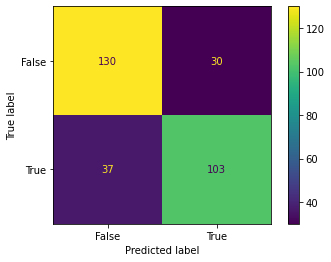

Kappa score 0.55


In [20]:
KNN_median = KNN_pipeline(imp[1])

Classifier: K-Nearest Neighbour  
Imputation Method:  most_frequent
0.754 (+/-0.041) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.755 (+/-0.04) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.736 (+/-0.061) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.743 (+/-0.058) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'distance'}
0.728 (+/-0.042) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'uniform'}
0.735 (+/-0.06) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'distance'}
0.754 (+/-0.041) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.755 (+/-0.04) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.736 (+/-0.061) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.743 (+/-0.058) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weig

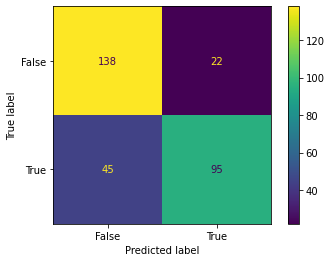

Kappa score 0.547


In [21]:
KNN_mode = KNN_pipeline(imp[2])

Classifier: K-Nearest Neighbour  
Imputation Method:  constant
0.745 (+/-0.058) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.746 (+/-0.056) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.713 (+/-0.06) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.729 (+/-0.044) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'distance'}
0.689 (+/-0.085) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'uniform'}
0.701 (+/-0.073) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'distance'}
0.745 (+/-0.058) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.746 (+/-0.056) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.713 (+/-0.06) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.729 (+/-0.044) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights'

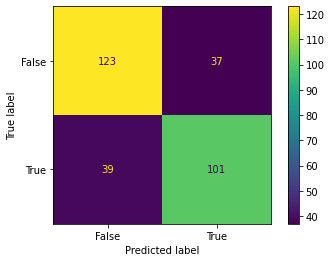

Kappa score 0.491


In [22]:
KNN_zero = KNN_pipeline(imp[3])

In [23]:
#Imports the hold out test set
P2_test_data = pd.read_csv('CE802_P2_Test.csv')
#Creates a copy of the test data to store results in
P2_test_data_copy = P2_test_data.copy()

In [24]:
#Function that applies the final model to 
def Final_model(hold_out_test):
    #Selects the mode as the imputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    #Selects SVC as the classifier, specifiying optimal parameters from the train/test stage
    model = svm.SVC(kernel = 'rbf', C= 100)
    #Pipeline created to apply imputer, scaler and model
    pipeline = Pipeline(steps=[('i', imputer), ('s', scaler), ('m', model)])
    print(pipeline)
    #Fits the training values to the pipeline
    pipeline = pipeline.fit(X_train, Y_train.values.ravel())
    #Produces the predictions on the hold out test data
    y_pred_test = pipeline.predict(hold_out_test)
    return y_pred_test

In [25]:
#Removes the empty class column from the dataset
P2_test_data = P2_test_data.iloc[:, 0:15]
#Runs the final model function with the hold out test data
y_pred_test = Final_model(P2_test_data)
#Applies the predictions to the empty class column of the copied dataset
P2_test_data_copy.loc[:, 'Class'] = y_pred_test

Pipeline(steps=[('i', SimpleImputer(strategy='most_frequent')),
                ('s', StandardScaler()), ('m', SVC(C=100))])


In [26]:
#Checks the test copy to ensure predictions have been applied
P2_test_data_copy.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,7.60,True
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,6.72,True
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,NaN,False
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,NaN,False
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,6.60,True
5,-7.32,-27.81,20,11.50,-7.61,4.38,10.27,-34.98,-448.72,2,-0.57,95.66,0.96,2.07,7.03,True
6,-2.40,-15.69,295,14.42,-3.56,16.65,15.52,-56.98,-608.72,20,7.80,189.66,9.25,-0.83,5.43,False
7,-10.77,-24.87,3,11.90,-7.19,0.99,10.38,-34.98,-442.72,2,-2.67,65.66,0.53,1.03,NaN,True
8,3.66,-12.96,325,13.28,-2.80,31.65,15.37,-36.98,-458.72,20,11.07,129.66,7.85,-3.28,6.63,False
9,-2.16,-33.81,210,8.48,-7.59,38.40,15.02,-56.98,-788.72,20,4.47,-30.34,5.35,-0.66,NaN,False


In [27]:
#Copies the final results to the hold out test CSV
P2_test_data_copy.to_csv('CE802_P2_Test.csv', index = False)